## importing libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:

train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [6]:
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


## Data Preprocessing

# chiecking for duplicates


In [7]:
sum(train.duplicated())

0

3,b checking null values

In [8]:
print("missing values" ,train.isna().values.sum())

missing values 0


3.c checking for class imbalance

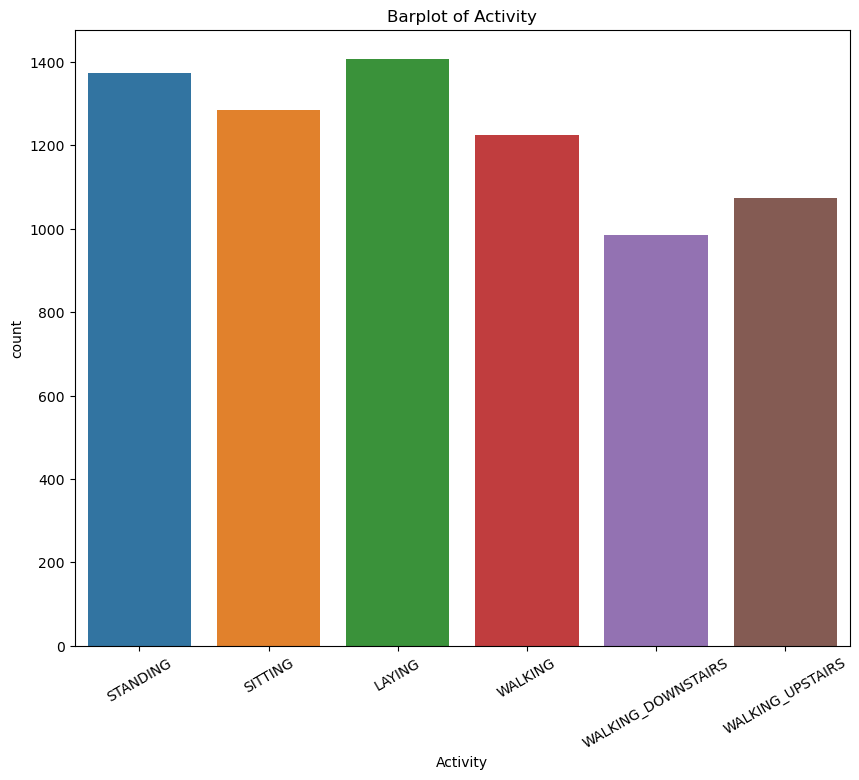

In [9]:
plt.figure(figsize=(10,8))
plt.title('Barplot of Activity')
sns.countplot(data=train, x='Activity')  # Only x is specified
plt.xticks(rotation = 30)
plt.show()

In [10]:

train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [11]:

pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]), 
                       orient = "index").rename(columns = {0:'count'})

,count
tBodyAcc,40
tGravityAcc,40
tBodyAccJerk,40
tBodyGyro,40
tBodyGyroJerk,40
tBodyAccMag,13
tGravityAccMag,13
tBodyAccJerkMag,13
tBodyGyroMag,13
tBodyGyroJerkMag,13


Mainly there are 'acceleration' and 'gyroscope' features. A few 'gravity' features are there as well. Impressive how many features there are in regard of the limited number of sensors used.

Based on the common nature of activities we can broadly put them in two categories.

**Static and dynamic activities : **
SITTING, STANDING, LAYING can be considered as static activities with no motion involved
WALKING, WALKING_DOWNSTAIRS, WALKING_UPSTAIRS can be considered as dynamic activities with significant amount of motion involved

Based on the common nature of activities we can broadly put them in two categories.

**Static and dynamic activities : **
SITTING, STANDING, LAYING can be considered as static activities with no motion involved
WALKING, WALKING_DOWNSTAIRS, WALKING_UPSTAIRS can be considered as dynamic activities with significant amount of motion involved
Let's consider tBodyAccMag-mean() feature to differentiate among these two broader set of activities.

If we try to build a simple classification model to classify the activity using one variable at a time then probability density function(PDF) is very helpful to assess importance of a continuous variable.

## ANALYSING HOW ACCELERATION IS STRONGLY RELATES TO THE BODY ACTIVITY

C:\Users\hp\anaconda43\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\hp\anaconda43\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda43\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar f

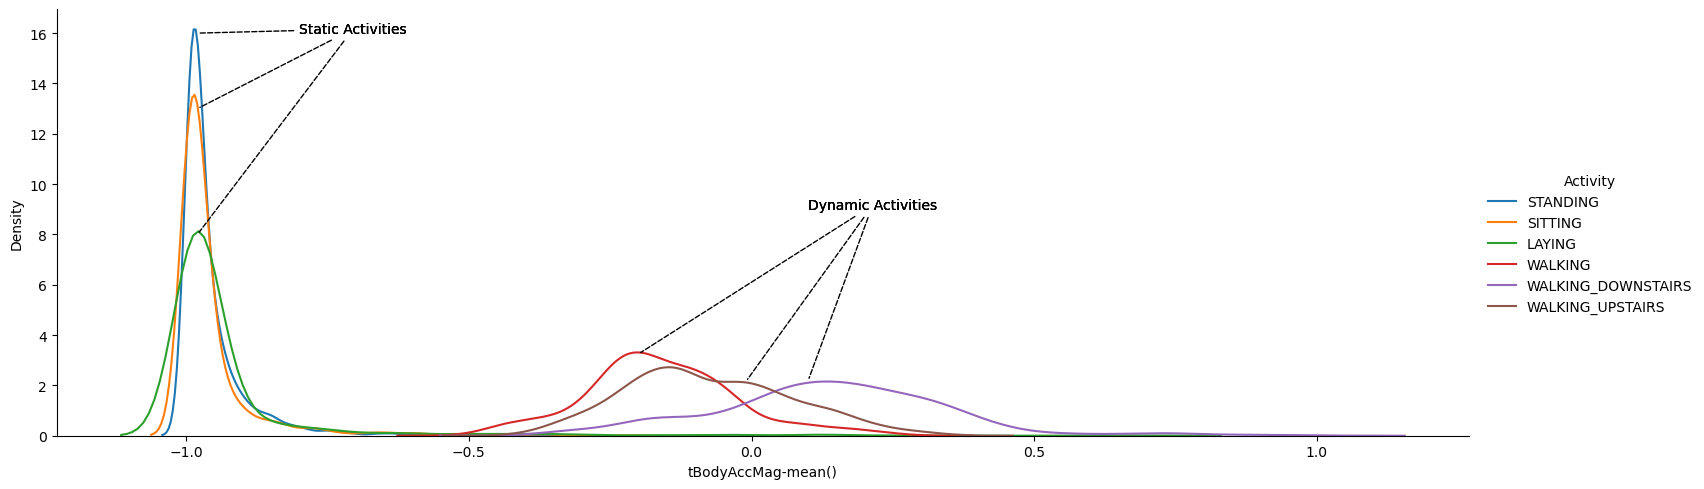

In [12]:
facetgrid = sns.FacetGrid(train, hue = 'Activity', height = 5, aspect = 3)
facetgrid.map(sns.distplot, 'tBodyAccMag-mean()', hist = False).add_legend()
plt.annotate("Static Activities", xy = (-.98, 8), xytext = (-.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy = (-.98, 13), xytext = (-.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy = (-.98, 16), xytext = (-.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.2,3.25), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(0.1,2.18), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.01,2.15), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

plt.show()

Using the above density plot we can easily come with a condition to seperate static activities from dynamic activities.

if(tBodyAccMag-mean()<=-0.5):
    Activity = "static"
else:
    Activity = "dynamic"
Let's have a more closer view on the PDFs of each activity under static and dynamic categorization.

C:\Users\hp\AppData\Local\Temp\ipykernel_11440\1974121104.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMag-mean()'],hist = False, label = 'Sitting')
C:\Users\hp\anaconda43\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\AppData\Local\Temp\ipykernel_11440\1974121104.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your 

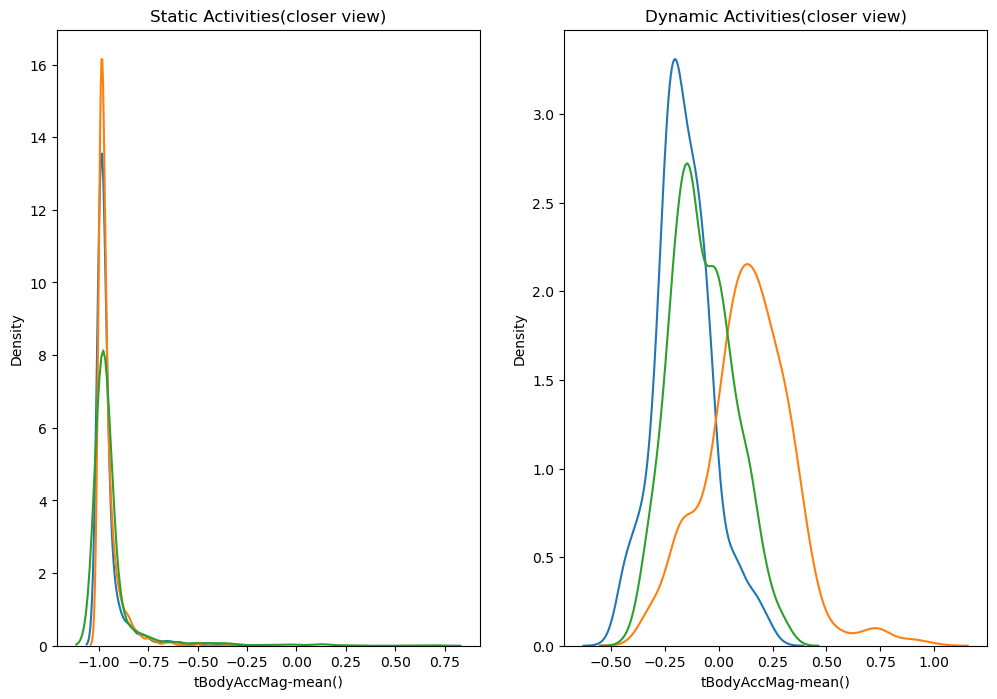

In [13]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(closer view)")
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMag-mean()'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMag-mean()'],hist = False,label = 'Standing')
sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMag-mean()'],hist = False, label = 'Laying')
plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view)")
sns.distplot(train[train["Activity"]=="WALKING"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING')
sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMag-mean()'],hist = False,label = 'WALKING_DOWNSTAIRS')
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING_UPSTAIRS')
plt.show()


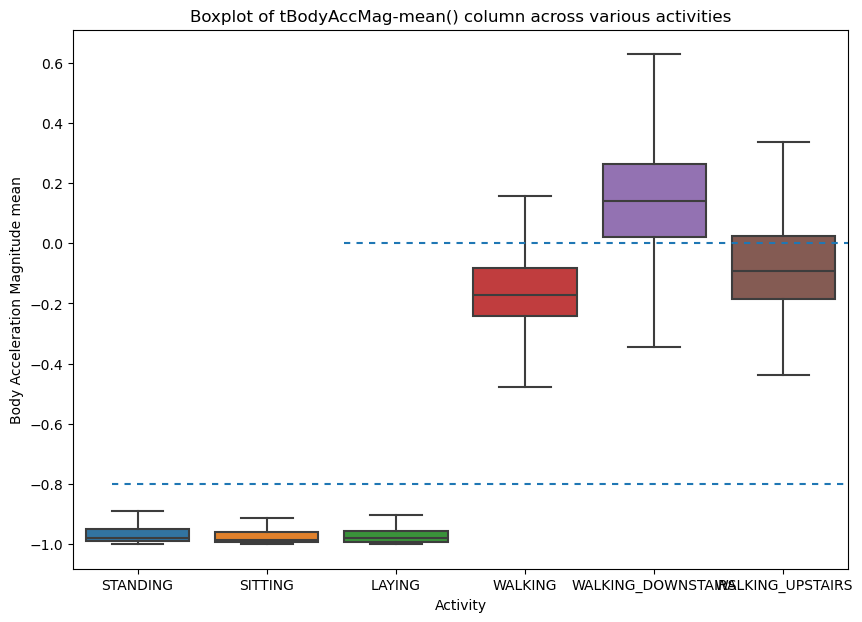

In [14]:

plt.figure(figsize=(10,7))
sns.boxplot(x = "Activity", y="tBodyAccMag-mean()", data = train, showfliers = False)
plt.ylabel('Body Acceleration Magnitude mean')
plt.title("Boxplot of tBodyAccMag-mean() column across various activities")
plt.axhline(y = -0.8, xmin = 0.05, dashes = (3,3))
plt.axhline(y= 0.0, xmin = 0.35, dashes=(3,3))
plt.show()

Using boxplot again we can come with conditions to seperate static activities from dynamic activities.

if(tBodyAccMag-mean()<=-0.8):
    Activity = "static"
if(tBodyAccMag-mean()>=-0.6):
    Activity = "dynamic"
Also, we can easily seperate WALKING_DOWNSTAIRS activity from others using boxplot.

if(tBodyAccMag-mean()>0.02):
    Activity = "WALKING_DOWNSTAIRS"
else:
    Activity = "others"

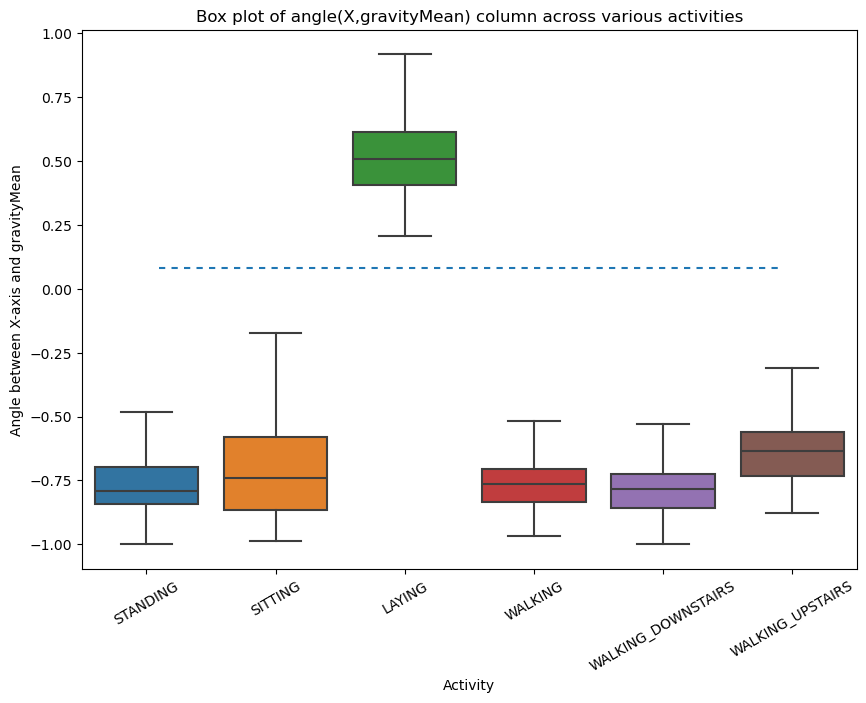

In [15]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train, showfliers=False)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,dashes=(3,3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title('Box plot of angle(X,gravityMean) column across various activities')
plt.xticks(rotation = 30)
plt.show()


Using boxplot again we can come with conditions to seperate static activities from dynamic activities.

if(tBodyAccMag-mean()<=-0.8):
    Activity = "static"
if(tBodyAccMag-mean()>=-0.6):
    Activity = "dynamic"
Also, we can easily seperate WALKING_DOWNSTAIRS activity from others using boxplot.

if(tBodyAccMag-mean()>0.02):
    Activity = "WALKING_DOWNSTAIRS"
else:
    Activity = "others"
But still 25% of WALKING_DOWNSTAIRS observations are below 0.02 which are

AttributeError: module 'matplotlib.pyplot' has no attribute 'showshow'

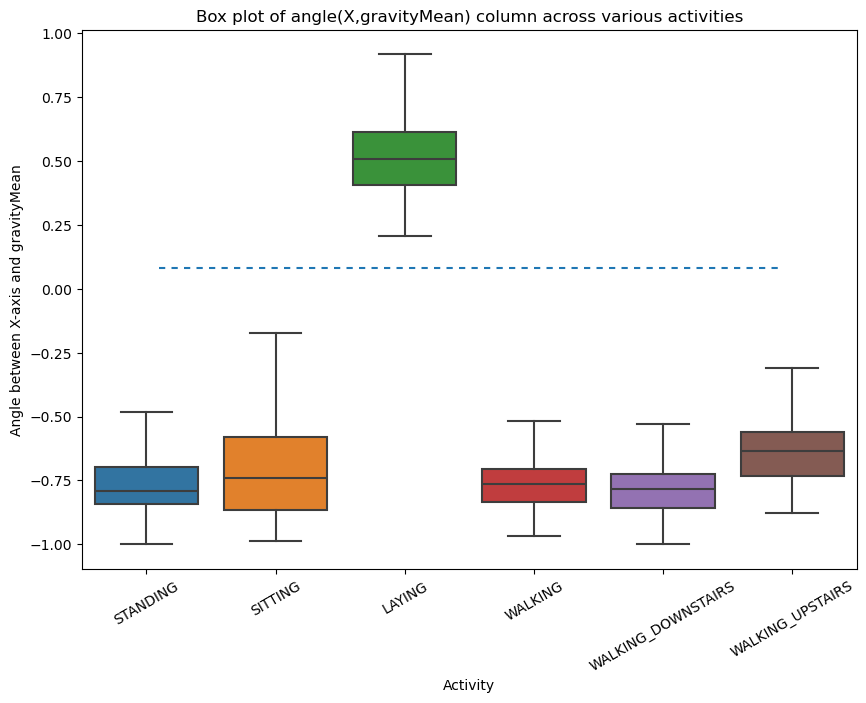

In [16]:

plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train, showfliers=False)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,dashes=(3,3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title('Box plot of angle(X,gravityMean) column across various activities')
plt.xticks(rotation = 30)
plt.showshow()


From the boxplot we can observe that angle(X,gravityMean) perfectly seperates LAYING from other activities.

if(angle(X,gravityMean)>0.01):
    Activity = "LAYING"
else:
    Activity = "others"

4.c Analysing Angle between Y-axis and gravityMean feature

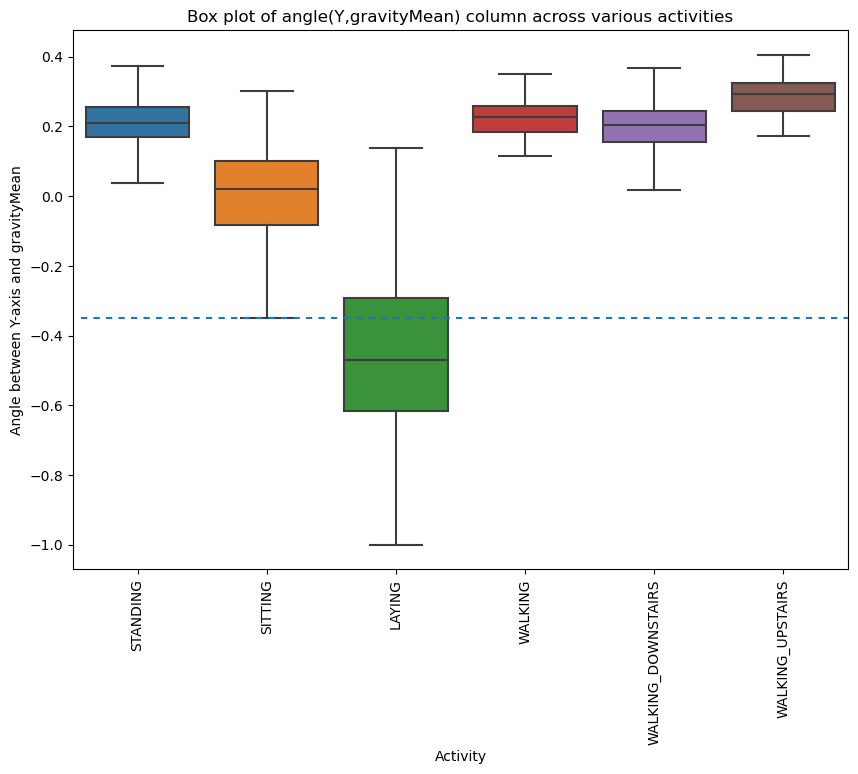

In [17]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(Y,gravityMean)', data = train, showfliers=False)
plt.ylabel("Angle between Y-axis and gravityMean")
plt.title('Box plot of angle(Y,gravityMean) column across various activities')
plt.xticks(rotation = 90)
plt.axhline(y=-0.35, xmin=0.01, dashes=(3,3))
plt.show()


Similarly, using Angle between Y-axis and gravityMean we can seperate LAYING from other activities but again it leads to some misclassification error.

## Visualizatotion of dat using  PCA

In [ ]:
x_for_pca = train.drop(['subject', 'Activity'], axis = 1)
pca = PCA(n_components=2, random_state=0).fit_transform(x_for_pca)


plt.figure(figsize=(12,8))
sns.scatterplot(x = pca[:, 0], y = pca[:, 1], hue = train['Activity'])
plt.show()



Using the two new components obtained through PCA we can visualize and seperate all the six activities in a 2D space.

In [ ]:
x_for_tsne = train.drop(['subject', 'Activity'], axis = 1)
tsne = TSNE(n_components=2, random_state=0, n_iter=1000).fit_transform(x_for_tsne)

In [ ]:
tsne

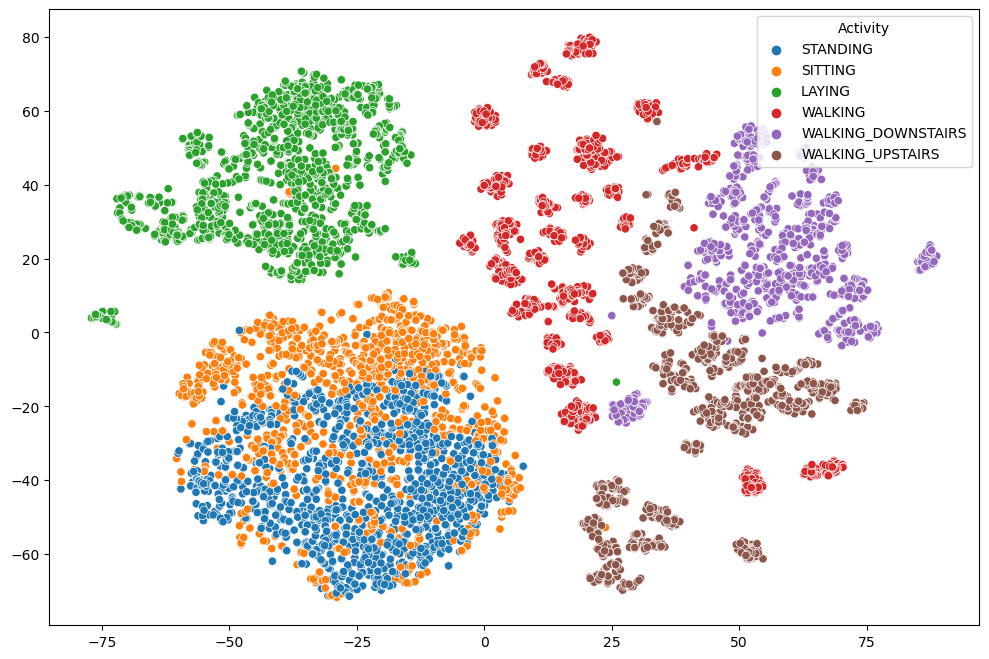

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = tsne[:, 0], y = tsne[:, 1], hue = train['Activity'])
plt.show()

In [29]:
x_for_tsne = train.drop(['subject', 'Activity'], axis = 1)
tsne = TSNE(n_components=2, random_state=0, n_iter=1000).fit_transform(x_for_tsne)

In [ ]:
tsne

5a logistic regression model eith hyperparamerer tuning and cross validation

In [30]:
X_train = train.drop(['subject', 'Activity'], axis = 1)
y_train = train.Activity

X_test = test.drop(['subject', 'Activity'], axis = 1)
y_test = test.Activity

In [31]:
print('Training data size : ', X_train.shape)
print('Test data size : ', X_test.shape)

Training data size :  (7352, 561)
Test data size :  (999, 561)


In [34]:
parameters = {'max_iter': [400, 600, 800]}
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions= parameters, cv = 5, random_state=42)
lr_classifier_rs.fit(X_train, y_train)

C:\Users\hp\anaconda43\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\hp\anaconda43\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda43\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as show

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'max_iter': [400, 600, 800]},
                   random_state=42)

In [37]:
lr_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_lr)
print("Accuracy using Logistic Regression : ", lr_accuracy)

NameError: name 'y_pred_lr' is not defined

## Decision tree model with Hyperparameter tuning and cross validationDe

In [41]:
import numpy as np
parameters = {'max_depth': np.arange(2, 10, 2)}
dt_classifier = DecisionTreeClassifier()

dt_classifier_rs = RandomizedSearchCV(dt_classifier, param_distributions = parameters, random_state = 42)
dt_classifier_rs = RandomizedSearchCV(dt_classifier, param_distributions = parameters, random_state = 42)
dt_classifier_rs.fit(X_train, y_train)


C:\Users\hp\anaconda43\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([2, 4, 6, 8])},
                   random_state=42)

In [42]:
get_best_randomsearch_results(rf_classifier_rs)


NameError: name 'get_best_randomsearch_results' is not defined

In [44]:

y_pred = dt_classifier_rs.predict(X_test)

In [45]:
rf_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Random forest : ", rf_accuracy)

Accuracy using Random forest :  0.8528528528528528


In [46]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

NameError: name 'plot_confusion_matrix' is not defined